## **Install library `betaPBH`**

In [1]:
pip install -i https://test.pypi.org/simple/ betaPBH

Looking in indexes: https://test.pypi.org/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 1.8 MB/s eta 0:00:00


##### Import modules from `betaPBH`

In [3]:
from betaPBH import functions, constants, constraints, BfN, BfS
import matplotlib.pyplot as plt
import numpy as np

In [4]:
functions.put_M_array(0.0123)

array([1.00000000e+00, 1.02872667e+00, 1.05827857e+00, ...,
       9.63604110e+19, 9.91285249e+19, 1.01976158e+20])

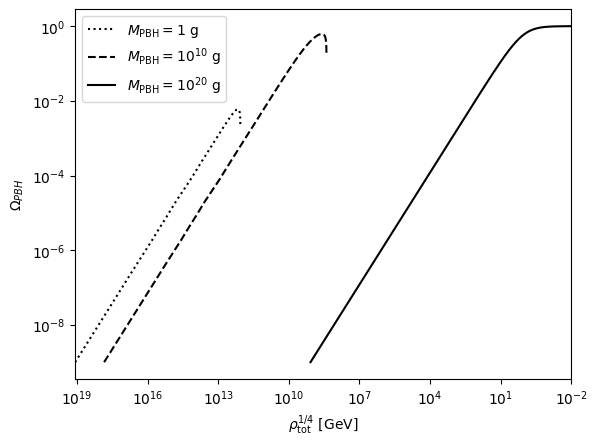

In [37]:
M_tot = np.array(constraints.M_tot)
omega=1./2.

k_end_over_k_rad = functions.k_end_over_k(M_tot, omega)
rho_end_inf = 3.*constants.M_pl**2.*constants.H_end**2.

log10_M_tot = np.linspace(0,20,1000)
rho_form_rad = functions.rho_f(M_tot,omega)
ln_den_end = np.log(constants.rho_end)

ln_den_try_1 = np.linspace(np.log(rho_form_rad[-1]),np.log(constants.rho_end),10000)
sol_try_1 = functions.solve_ivp(functions.diff_rad,(np.log(rho_form_rad[-1]),ln_den_end),np.array([1.,0.]),events=functions.end_evol,t_eval=ln_den_try_1,args=(M_tot[-1],1e-9),method = "DOP853")
Delta_t_try_1 = constants.t_pl*(M_tot[-1]/constants.M_pl_g)**3
Om_try_1 =  1e-9*sol_try_1.y[0]*(1.-sol_try_1.y[1]/Delta_t_try_1)**(1./3)

ln_den_try_2 = np.linspace(np.log(rho_form_rad[0]),np.log(constants.rho_end),10000)
sol_try_2 = functions.solve_ivp(functions.diff_rad,(np.log(rho_form_rad[0]),ln_den_end),np.array([1.,0.]),events=functions.end_evol,t_eval=ln_den_try_2,args=(M_tot[0],1e-9),method = "DOP853")
Delta_t_try_2 = constants.t_pl*(M_tot[0]/constants.M_pl_g)**3
Om_try_2 =  1e-9*sol_try_2.y[0]*(1.-sol_try_2.y[1]/Delta_t_try_2)**(1./3)

ln_den_try_3 = np.linspace(np.log(rho_form_rad[200]),np.log(constants.rho_end),10000)
sol_try_3 = functions.solve_ivp(functions.diff_rad,(np.log(rho_form_rad[200]),ln_den_end),np.array([1.,0.]),events=functions.end_evol,t_eval=ln_den_try_3,args=(M_tot[200],1e-9),method = "DOP853")
Delta_t_try_3 = constants.t_pl*(M_tot[200]/constants.M_pl_g)**3
Om_try_3 =  1e-9*sol_try_3.y[0]*(1.-sol_try_3.y[1]/Delta_t_try_3)**(1./3)


plt.loglog(np.exp(sol_try_2.t)**(1/4),Om_try_2, "k:", label=r"$M_{\rm PBH}= 1\ \rm{g}$")
plt.loglog(np.exp(sol_try_3.t)**(1/4),Om_try_3, "k--", label=r"$M_{\rm PBH}= 10^{10}\ \rm{g}$")
plt.loglog(np.exp(sol_try_1.t)**(1/4),Om_try_1,"k", label=r"$M_{\rm PBH}= 10^{20}\ \rm{g}$")


plt.xlim([np.exp(sol_try_2.t[0])**(1/4),np.exp(sol_try_1.t[-1])**(1/4)])
plt.ylabel(r"$\Omega_{PBH}$")
plt.xlabel(r"$\rho_{\rm tot}^{1/4}\ [\rm{GeV}]$")
plt.legend()
plt.show()

In [10]:
functions.Betas_DM(M_tot)
functions.Betas_BBN(M_tot,omega)
functions.Betas_CMB_AN(M_tot,omega)
functions.Betas_GRB(M_tot,omega)
functions.Betas_Reio(M_tot,omega)
functions.Betas_SD(M_tot,omega)
functions.Betas_LSP(M_tot)
functions.get_Betas_full(M_tot)

array([4.49001607e-21, 4.68487378e-21, 4.88818794e-21, ...,
       1.31614339e-15, 1.33491375e-15, 1.35395181e-15])

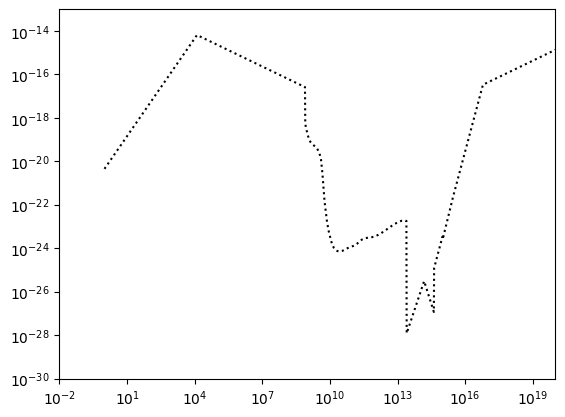

In [11]:
plt.loglog(M_tot,constraints.betas_full,"k:")
plt.ylim([1e-30,1e-13])
plt.xlim([1e-2,1e20])

plt.show()

##### Realizar Cálculos de Abundancias a traves de una función tal que:

$$\beta = \beta\left(N_{\rm reh}, \Omega, γ_{\rm reh}\right)$$

##### Dentro del codigo esta función está definida de la siguiente manera:
######  BfN.get_betas_reh_tot(N_re, omega, gam_reh):

##### La siguiente linea de código permite graficar los resultados con base a un arreglo de masas de PBHs; llamado **data_M_tot**, dicho arreglo esta siendo invocado desde el modulo **constraints**.

/usr/local/lib/python3.10/dist-packages/betaPBH/BfN.py:106: RuntimeWarning: invalid value encountered in double_scalars
  Om_0 =  beta0*b*(1.-time/Delta_t)**(1./3)
/usr/local/lib/python3.10/dist-packages/betaPBH/BfN.py:108: RuntimeWarning: divide by zero encountered in double_scalars
  dy[1] = 3**(1./2)*M_pl/((Om_0+(1-3*omega)*Om_ext-4.)*np.exp(ln_rho)**(1./2))


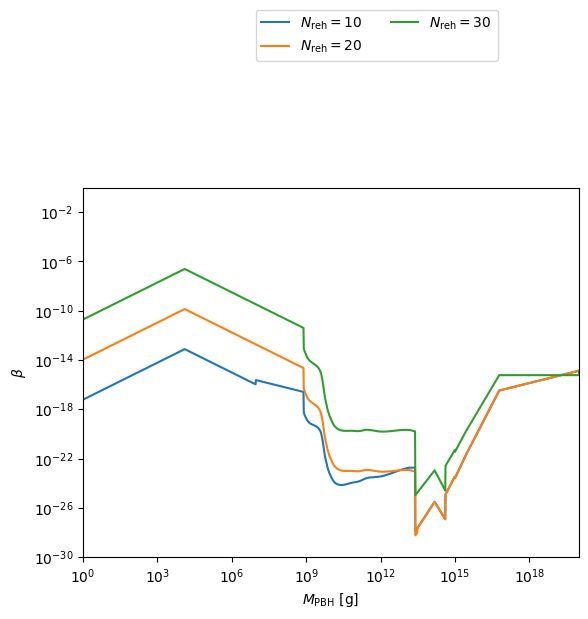

In [7]:
plt.loglog(M_tot,BfN.get_betas_reh_tot(10,0,1),label = r"$N_{\rm reh}=10$")
plt.loglog(M_tot,BfN.get_betas_reh_tot(20,0,1),label = r"$N_{\rm reh}=20$")
plt.loglog(M_tot,BfN.get_betas_reh_tot(30,0,1),label = r"$N_{\rm reh}=30$")
plt.ylim([1e-30,1])
plt.xlim([1,1e20])
plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\beta$")
plt.legend(ncol=2,bbox_to_anchor=(0.85, 1.5))
plt.show()

##### Realizar Cálculos de Abundancias a traves de una función tal que:  $$\beta = \beta\left(N_{\rm stiff}, \omega, \gamma_{\rm stiff}\right)$$

##### Dentro del codigo esta función está definida de la siguiente manera:
###### BfS.get_betas_stiff_tot(N_stiff, omega, gamma_stiff)

##### La siguiente linea de código permite graficar los resultados con base a un arreglo de masas de PBHs; llamado **data_M_tot**, dicho arreglo esta siendo invocado desde el modulo **constraints**.

/usr/local/lib/python3.10/dist-packages/betaPBH/BfS.py:83: RuntimeWarning: invalid value encountered in double_scalars
  Om_0 =  beta0*b*(1.-time/Delta_t)**(1./3)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


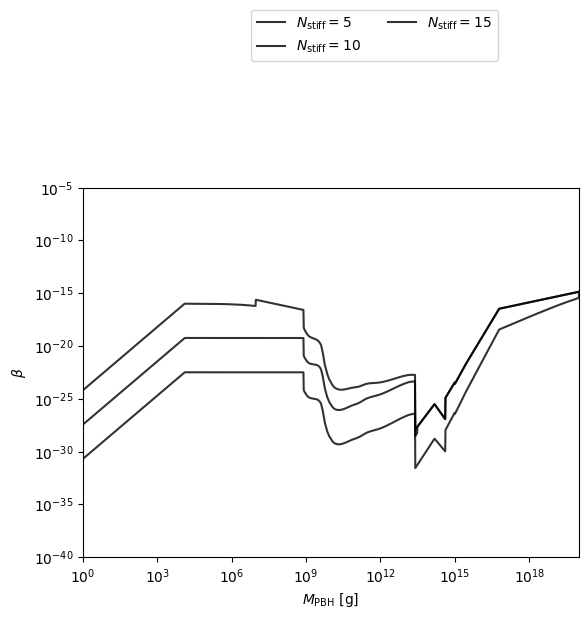

In [7]:
plt.loglog(M_tot,BfS.get_betas_stiff_tot(5,1.,1.),"k",label = r"$N_{\rm stiff} = 5$",alpha = 0.8)
plt.loglog(M_tot,BfS.get_betas_stiff_tot(10,1.,1.),"k",label = r"$N_{\rm stiff} = 10$",alpha = 0.8)
plt.loglog(M_tot,BfS.get_betas_stiff_tot(15,1.,1.),"k",label = r"$N_{\rm stiff} = 15$",alpha = 0.8)
plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\beta$")
plt.ylim([1e-40,1e-5])
plt.xlim([1,1e20])
plt.legend(ncol=2,bbox_to_anchor=(0.85, 1.5))
plt.show()